# W1 Data Challenge

### Part 1

In [1]:
#!pip install yfinance
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load data for Bank of America (BAC), Goldman Sachs (GS), JPMorgan Chase (JPM), Morgan Stanley (MS), 
# and Wells Fargo (MFC) from 2000 to today 
data = yf.download("BAC, GS, JPM, MS, WFC", start="2000-1-1")
data.head()

[*********************100%***********************]  5 of 5 completed


Adj Close                                                 Close  \
                  BAC         GS        JPM         MS        WFC       BAC   
Date                                                                          
2000-01-03  13.893577  68.596458  25.715622  37.911312  10.768756  24.21875   
2000-01-04  13.068926  64.275795  25.151373  35.103085  10.235478  22.78125   
2000-01-05  13.212340  61.265915  24.996122  33.821819  10.132262  23.03125   
2000-01-06  14.341758  63.887451  25.351000  34.471230  10.579529  25.00000   
2000-01-07  13.965284  64.130188  25.816750  35.541882  10.768756  24.34375   

                                                    ...      Open           \
                 GS        JPM        MS       WFC  ...       BAC       GS   
Date                                                ...                      
2000-01-03  88.3125  48.583332  67.50000  19.56250  ...  25.12500  94.1875   
2000-01-04  82.7500  47.250000  62.50000  18.59375  ...  23.87500  87.0000   
2000-01-05  78.8750  46.958332  60.21875  18.40625  ...  22.53125  80.8750   
2000-01-06  82.2500  47.625000  61.37500  19.21875  ...  23.46875  78.6250   
2000-01-07  82.5625  48.500000  63.28125  19.56250  ...  24.81250  83.0625   

                                            Volume                     \
                  JPM       MS       WFC       BAC       GS       JPM   
Date                                                                    
2000-01-03  49.833332  68.6250  20.15625  13705800  1822600  12019200   
2000-01-04  47.083332  66.0000  18.62500  27293400  1647700  11723400   
2000-01-05  46.833332  62.0000  18.50000  22855600  1516600   8714550   
2000-01-06  46.750000  60.1875  18.53125  17307000  1845100   8369250   
2000-01-07  48.416668  60.2500  19.62500  11632800  1127400   6571950   

                               
                 MS       WFC  
Date                           
2000-01-03  5309000   9037000  
2000-01-04  6234400  15237200  
2000-01-05  7744200   8228200  
2000-01-06  6586000   8326800  
2000-01-07  6324800   7711200  

[5 rows x 30 columns]

### Part 2

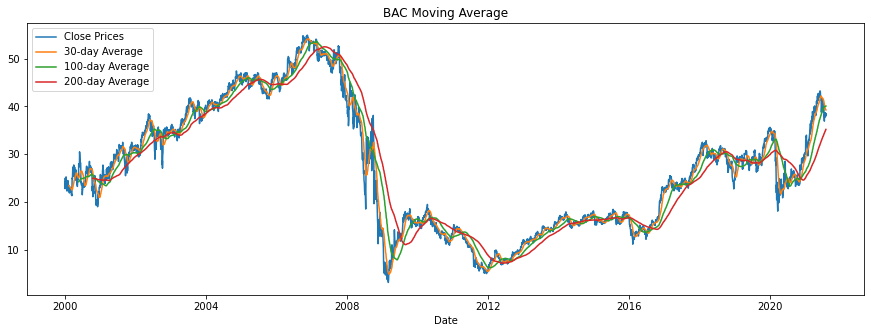

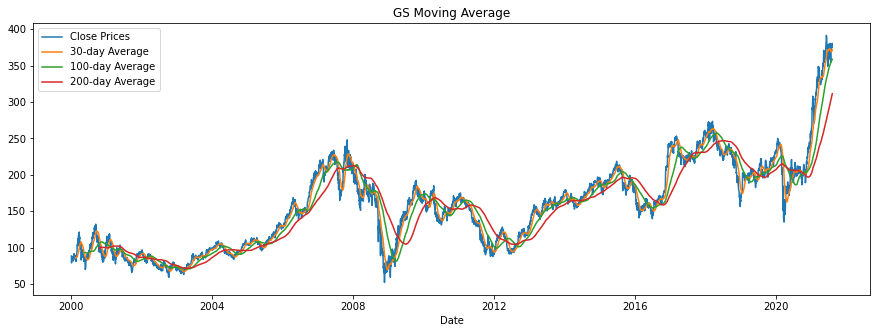

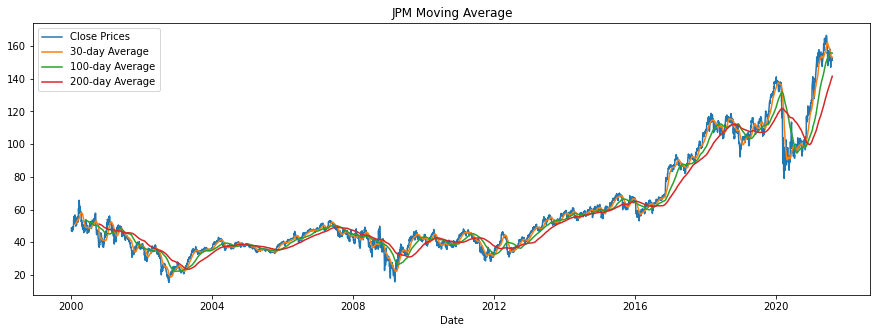

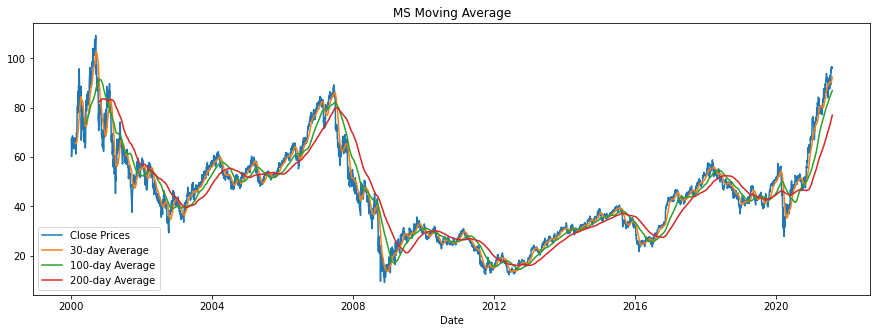

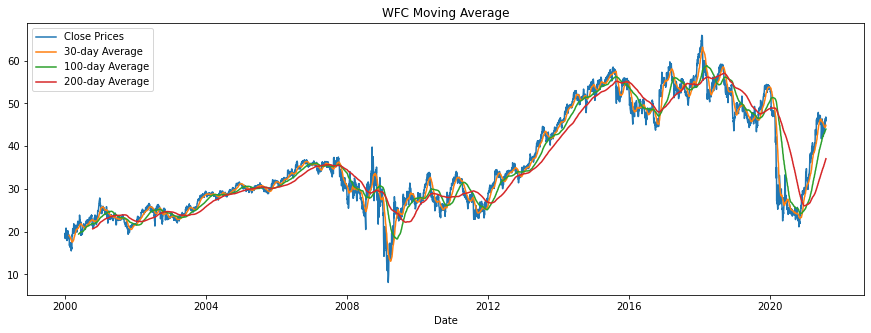

In [3]:
for bank in ["BAC", "GS", "JPM", "MS", "WFC"]:
    fig = plt.figure(figsize=(15, 5))
    ax = fig.add_subplot()
    ax.plot(data["Close"][bank], label="Close Prices")
    for days in [30, 100, 200]:
        ax.plot(data["Close"][bank].rolling(days).mean(), label="{0}-day Average".format(days))
        plt.title(bank +  " Moving Average")
        plt.xlabel("Date")
        plt.legend()
    plt.show()
            

### Part 3

In [4]:
data_roc = data["Close"].pct_change()

<Figure size 432x288 with 0 Axes>

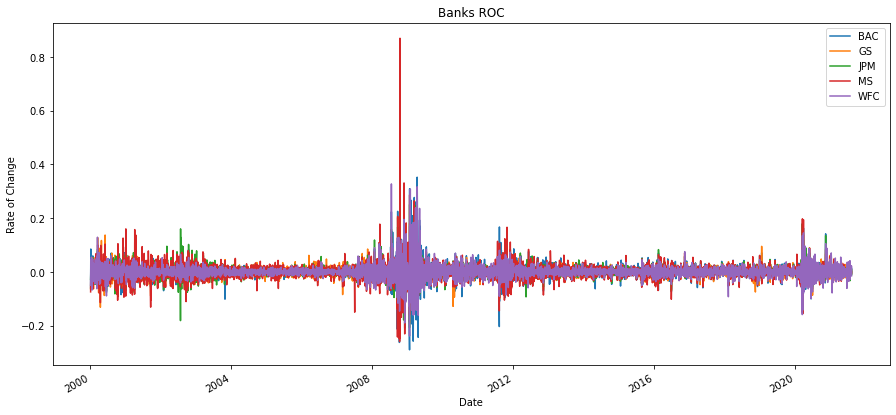

In [5]:
fig = plt.figure()
data_roc.plot(figsize=(15, 7))
plt.title("Banks ROC")
plt.xlabel("Date")
plt.ylabel("Rate of Change")
plt.legend()
plt.show()

### Part 4

In [6]:
# Create a new column for the change (difference between open and close prices) for each day
for bank in ["BAC", "GS", "JPM", "MS", "WFC"]:
    data[("Difference", bank)] = data["Open"][bank] - data["Close"][bank]    

In [7]:
data["Difference"].describe()

,BAC,GS,JPM,MS,WFC
count,5432.000000,5432.000000,5432.000000,5432.000000,5432.000000
mean,0.003721,-0.025256,-0.001329,-0.003030,-0.000432
std,0.485883,2.747078,0.981185,1.040155,0.571263
min,-4.519999,-15.437500,-7.920006,-11.500000,-4.150000
25%,-0.200001,-1.400002,-0.430000,-0.439999,-0.259998
50%,0.000000,-0.040001,-0.009998,0.000000,0.000000
75%,0.199999,1.309999,0.430000,0.439999,0.250000
max,6.450001,22.919998,6.110001,9.000000,5.810001


Noteworthy:  
GS and MS both have much bigger drops than the other banks  
GS has a massive increase in price  

In [8]:
data["Difference"].idxmin()

BAC   2008-09-16
GS    2001-01-03
JPM   2020-03-13
MS    2001-01-03
WFC   2009-05-08
dtype: datetime64[ns]

In [9]:
data["Difference"].idxmax()

BAC   2008-09-29
GS    2010-04-16
JPM   2008-10-07
MS    2000-04-12
WFC   2008-10-09
dtype: datetime64[ns]

Noteworthy:  
GS and MS both crashed on 2001-01-03  
BAC, WFC, JPM all jumped in late September/early October of 2008
